# Step 1: Environment Setup and Data Loading
1. Set Up Google Colab Environment: If you haven't already, ensure your Google Colab environment is ready for use.

2. Import Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer


Load the Dataset: Assuming you've mounted your in file of Collab and have the dataset path

In [3]:
data = pd.read_csv("/content/sample_data/creditcard.csv")

# Step 2: Data Preprocessing
1. Understanding and Describing the Data:

In [4]:
print(data.head())
print(data.shape)
print(data.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

2.Handling Imbalanced Data:

-Calculate the imbalance ratio.


In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')


Fraud Cases: 2
Valid Transactions: 3970


3.Data Cleaning:

Check for and handle missing values. For simplicity, we'll fill NaNs with the median value.


In [6]:
imputer = SimpleImputer(strategy='median')
data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


4.Feature Selection and Data Split:

Separate features (X) and target (Y), and split the dataset.

In [7]:
imputer = SimpleImputer(strategy='median')
data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [8]:
X = data_filled.drop(['Class'], axis=1)
Y = data_filled['Class']
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)


# Step 3: Model Building and Training
 1. Random Forest Model:


In [9]:
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)


RandomForestClassifier()

# Step 4: Model Evaluation
  1. Predictions and Evaluating Metrics:



In [10]:
yPred = rfc.predict(xTest)
print(f"Accuracy: {accuracy_score(yTest, yPred)}")
print(f"Precision: {precision_score(yTest, yPred)}")
print(f"Recall: {recall_score(yTest, yPred)}")
print(f"F1-Score: {f1_score(yTest, yPred)}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(yTest, yPred)}")


Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Matthews Correlation Coefficient: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


  2.Confusion Matrix Visualization:

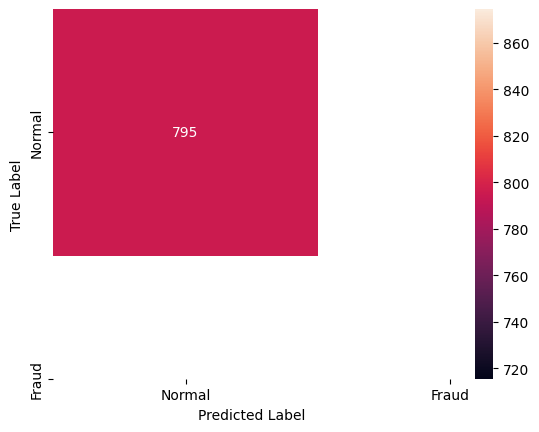

In [11]:
conf_matrix = confusion_matrix(yTest, yPred)
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


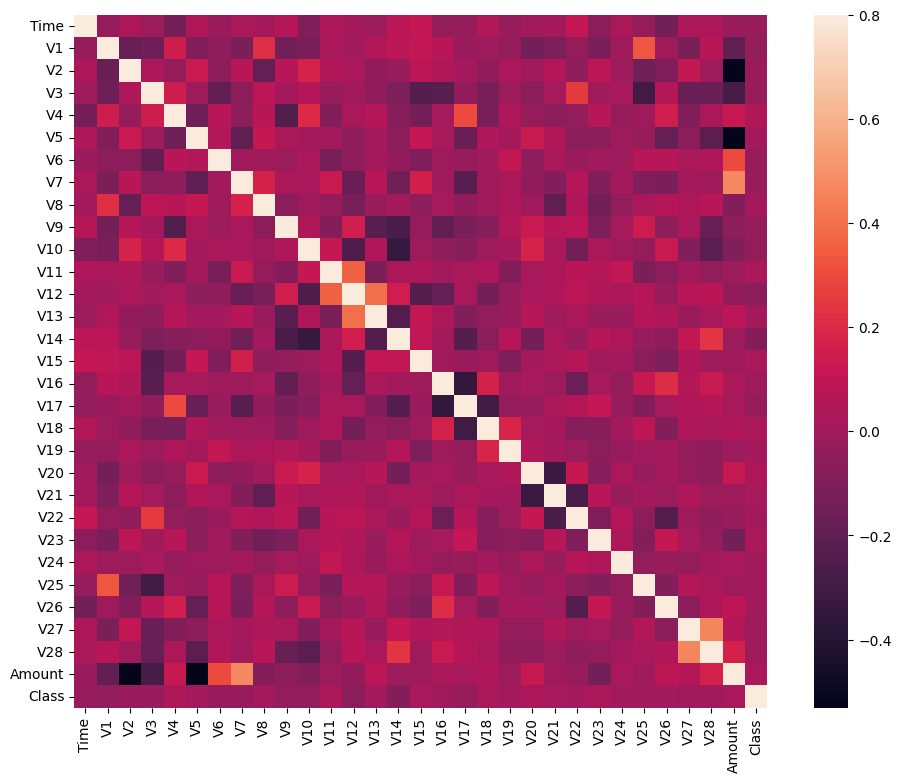

In [12]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# Step 5: Reanalyze and Refine
Reanalyze: Review the model's performance metrics. If the performance is not satisfactory, consider hyperparameter tuning, trying different models, or further preprocessing the data.

Training Strategy: Depending on the model's performance, consider strategies like oversampling the minority class, undersampling the majority class, or employing more sophisticated techniques like SMOTE for balancing the dataset.

Model Comparison: If necessary, compare the Random Forest model with other algorithms like Gradient Boosting, Logistic Regression, or Neural Networks to find the best performing model for your specific dataset.

In [19]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=min([5, len(yTrain[yTrain == 1]) - 1]))

# Balance the dataset
xTrain_balanced, yTrain_balanced = smote.fit_resample(xTrain, yTrain)
# Training RandomForest on the balanced dataset
rfc.fit(xTrain_balanced, yTrain_balanced)

# Predictions
yPred_balanced = rfc.predict(xTest)

In [21]:
# Check the number of samples in the minority class
minority_class_count = len(yTrain[yTrain == 1])
print(f"Minority class sample count: {minority_class_count}")


Minority class sample count: 2


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
gb = GradientBoostingClassifier()
lr = LogisticRegression(max_iter=1000)

# Train models
gb.fit(xTrain_balanced, yTrain_balanced)
lr.fit(xTrain_balanced, yTrain_balanced)

# Predictions
yPred_gb = gb.predict(xTest)
yPred_lr = lr.predict(xTest)

# Evaluation
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_pred)}")

print("RandomForest:")
evaluate_model(yTest, yPred_balanced)

print("\nGradientBoosting:")
evaluate_model(yTest, yPred_gb)

print("\nLogisticRegression:")
evaluate_model(yTest, yPred_lr)


RandomForest:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

GradientBoosting:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

LogisticRegression:
Accuracy: 0.9987421383647799
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parame

Hyperparameter Tuning: The param_grid in the GridSearchCV example is just a starting point. Depending on computational resources and time, you might want to expand or narrow down the search.

SMOTE: While SMOTE can help balance the dataset, it's essential to only apply it to the training data to avoid information leakage into the test set.

Model Evaluation: The evaluation function evaluate_model gives a quick comparison across different metrics. Depending on your specific requirements (e.g., reducing false positives), you might prioritize some metrics over others.

Final Model Choice: The choice of the best model can depend on the specific performance metric you're optimizing for (e.g., recall, precision, F1-score). It's also essential to consider the model's interpretability and the computational cost of training and inference.